In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#loading Dataset
df=pd.read_csv("global_unemployment_data.csv")
df.head()

,country_name,indicator_name,sex,age_group,age_categories,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,Unemployment rate by sex and age,Female,15-24,Youth,13.340,15.974,18.570,21.137,20.649,20.154,21.228,21.640,30.561,32.200,33.332
1,Afghanistan,Unemployment rate by sex and age,Female,25+,Adults,8.576,9.014,9.463,9.920,11.223,12.587,14.079,14.415,23.818,26.192,28.298
2,Afghanistan,Unemployment rate by sex and age,Female,Under 15,Children,10.306,11.552,12.789,14.017,14.706,15.418,16.783,17.134,26.746,29.193,30.956
3,Afghanistan,Unemployment rate by sex and age,Male,15-24,Youth,9.206,11.502,13.772,16.027,15.199,14.361,14.452,15.099,16.655,18.512,19.770
4,Afghanistan,Unemployment rate by sex and age,Male,25+,Adults,6.463,6.879,7.301,7.728,7.833,7.961,8.732,9.199,11.357,12.327,13.087


In [3]:
df.columns

Index(['country_name', 'indicator_name', 'sex', 'age_group', 'age_categories',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024'],
      dtype='object')

In [4]:
df.shape

(1134, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    1134 non-null   object 
 1   indicator_name  1134 non-null   object 
 2   sex             1134 non-null   object 
 3   age_group       1134 non-null   object 
 4   age_categories  1134 non-null   object 
 5   2014            1134 non-null   float64
 6   2015            1134 non-null   float64
 7   2016            1134 non-null   float64
 8   2017            1134 non-null   float64
 9   2018            1134 non-null   float64
 10  2019            1134 non-null   float64
 11  2020            1134 non-null   float64
 12  2021            1134 non-null   float64
 13  2022            1128 non-null   float64
 14  2023            1122 non-null   float64
 15  2024            1122 non-null   float64
dtypes: float64(11), object(5)
memory usage: 141.9+ KB


In [6]:
df.describe()

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
count,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1128.000000,1122.000000,1122.000000
mean,11.387800,11.272444,11.122963,10.863516,10.516499,10.311452,11.851285,11.422645,10.340361,9.985181,9.940089
std,11.119002,10.915942,10.742947,10.640980,10.527773,10.297952,11.231580,10.873412,10.264810,9.987778,9.977512
min,0.027000,0.034000,0.038000,0.035000,0.044000,0.036000,0.056000,0.064000,0.067000,0.063000,0.060000
25%,3.933500,3.993500,3.945250,3.747500,3.672750,3.538500,4.334500,4.153500,3.555250,3.477500,3.459750
50%,7.697500,7.547500,7.504500,7.140500,6.706000,6.627500,8.067500,7.542500,6.571500,6.466000,6.364000
75%,15.050750,14.766250,14.467500,14.142000,13.343000,13.285500,15.316250,14.881500,13.410000,12.914500,12.687750
max,74.485000,74.655000,74.720000,75.416000,76.395000,77.173000,83.990000,82.135000,78.776000,78.541000,78.644000


In [7]:
#checking no of null values per column
df.isna().sum()

country_name       0
indicator_name     0
sex                0
age_group          0
age_categories     0
2014               0
2015               0
2016               0
2017               0
2018               0
2019               0
2020               0
2021               0
2022               6
2023              12
2024              12
dtype: int64

In [8]:
#dropping rows with null values 
df.dropna(inplace=True)

In [9]:
#checking duplicated values
df.duplicated().sum()

0

In [10]:
#checking no of unique values per column
df.nunique()

country_name       187
indicator_name       1
sex                  2
age_group            3
age_categories       3
2014              1092
2015              1102
2016              1093
2017              1090
2018              1084
2019              1091
2020              1092
2021              1085
2022              1097
2023              1088
2024              1089
dtype: int64

# Histogram showing latest unemployment distribution

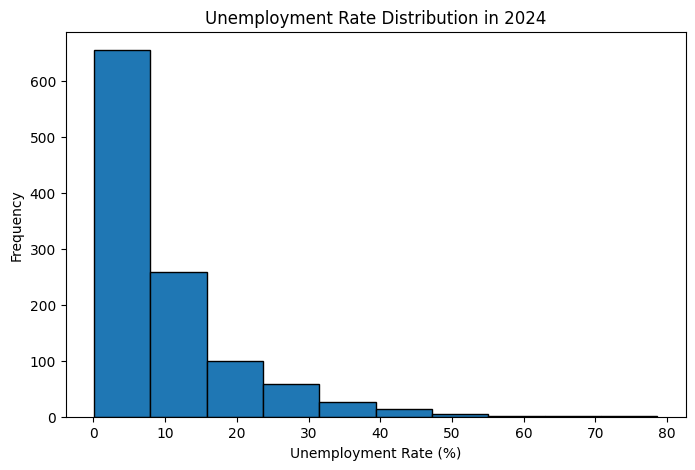

In [11]:
plt.figure(figsize=(8, 5))
plt.hist(df['2024'],edgecolor='black')
plt.title('Unemployment Rate Distribution in 2024')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()

## Bar Graph representing distribution of Age Categories

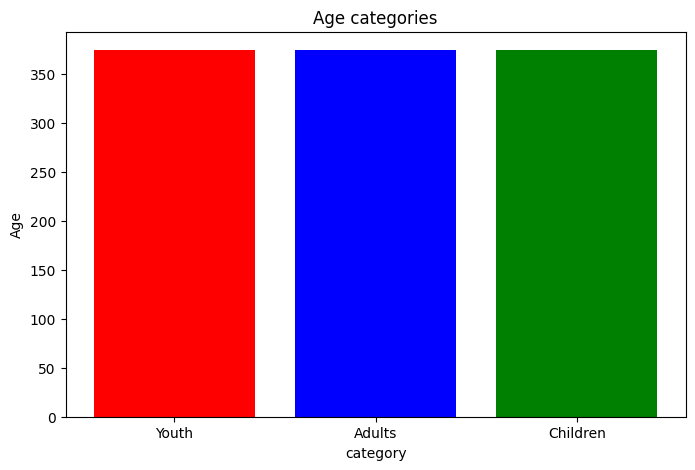

In [12]:
ax = df['age_categories'].value_counts()

colors = ['red', 'blue', 'green']  
plt.figure(figsize=(8, 5))
bars = plt.bar(ax.index, ax.values, color=colors)

plt.title('Age categories')
plt.xlabel('category')
plt.ylabel('Age')

plt.show()

## Pie-Chart showing Gender Distribution

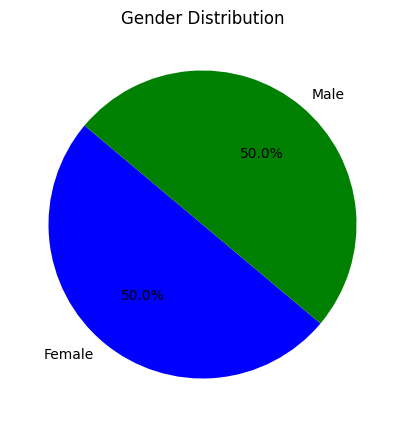

In [13]:
sex_counts = df['sex'].value_counts()

colors = ['blue', 'green']
plt.figure(figsize=(8,5))
plt.pie(sex_counts, labels=sex_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)

plt.title('Gender Distribution')
plt.show()

## Scatter plot showing latest unemployment rate by age group

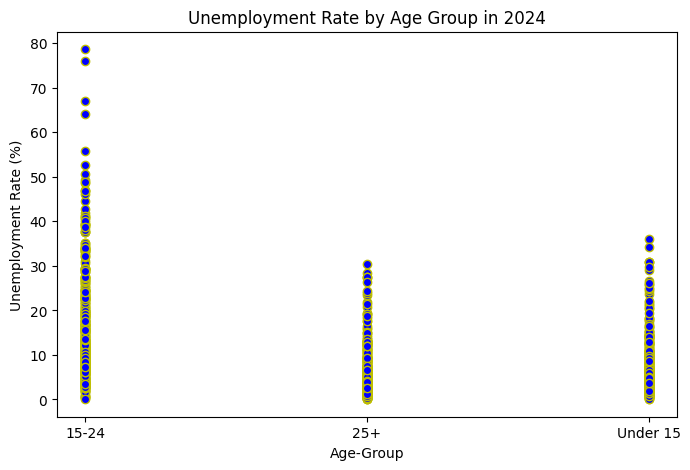

In [14]:
plt.figure(figsize=(8, 5))
plt.scatter(df['age_group'], df['2024'], color="blue", edgecolor="y")
plt.xlabel("Age-Group")
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Rate by Age Group in 2024")
plt.show()

## Bar Graph representing unemployment rate of top 50 Countries

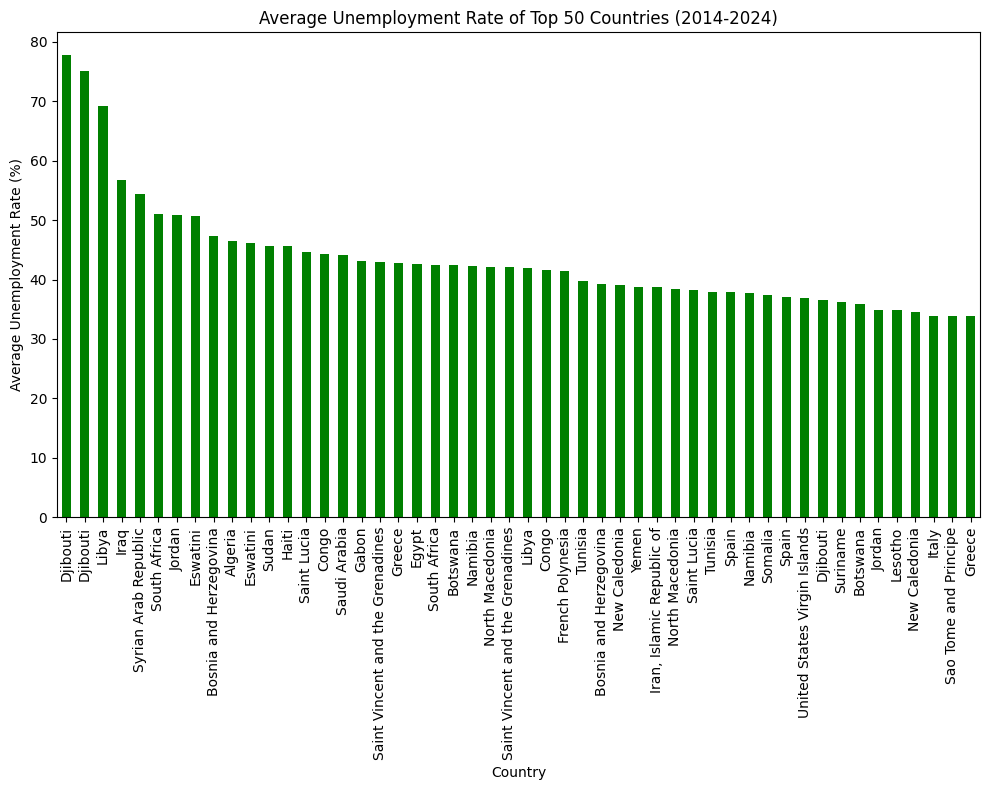

In [15]:
df['Average'] = df[['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']].mean(axis=1)
df_sorted = df.sort_values(by='Average', ascending=False)

top_countries = df_sorted.head(50)
top_countries.plot(kind='bar', x='country_name', y='Average', figsize=(10, 8), color='green',legend=False)

plt.title('Average Unemployment Rate of Top 50 Countries (2014-2024)')
plt.xlabel('Country')
plt.ylabel('Average Unemployment Rate (%)')

plt.tight_layout()
plt.show()

## Line Graph Showing Average Unemployment Rate by Years

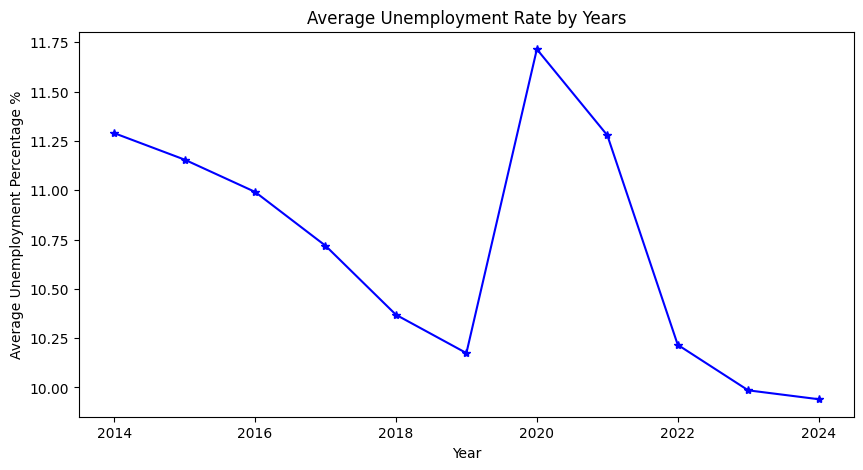

In [16]:
avg_unemployment_year = df[['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']].mean()
plt.figure(figsize=(10,5))
avg_unemployment_year.plot(kind='line', marker='*',color = 'blue')
plt.title('Average Unemployment Rate by Years')
plt.xlabel('Year')
plt.ylabel('Average Unemployment Percentage %')
plt.show()